In [6]:
import icarogw
import os
import pickle
import bilby
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis
import matplotlib.pyplot as plt
import numpy as np

# Running a reduced population and cosmological analysis 

In order to get an impression of the analysis, we want to run the MCMC analysis on a reduced parameter space. 
We fix the mass model to a PL with Gaussian peak and only leave the Gaussian mean $\mu_g$ to vary. We also fix the matter content of the universe and only estimate the Hubble constant. Finally, we fix the redshift distribition of sources. 

15:09 bilby INFO    : Running for label 'ciao', output will be saved to 'H0_GWTC-1_PL_2/'
15:09 bilby INFO    : Search parameters:
15:09 bilby INFO    :   mu_g = Uniform(minimum=20, maximum=50, name='mu_g', latex_label='mu_g', unit=None, boundary=None)
15:09 bilby INFO    :   H0 = Uniform(minimum=20, maximum=120, name='H0', latex_label='H0', unit=None, boundary=None)
15:09 bilby INFO    :   gamma = 0
15:09 bilby INFO    :   alpha = 1.6
15:09 bilby INFO    :   beta = 0.0
15:09 bilby INFO    :   mmax = 80.0
15:09 bilby INFO    :   mmin = 5
15:09 bilby INFO    :   sigma_g = 5.0
15:09 bilby INFO    :   lambda_peak = 0.1
15:09 bilby INFO    :   delta_m = 5
15:09 bilby INFO    :   Om0 = 0.308


Selecting injections with SNR 12.000000 and IFAR 0.000000 yr
GW150914
Using Overall_posterior posterior with a total of 8350 samples
GW151226
Using Overall_posterior posterior with a total of 52252 samples
GW170104
Using Overall_posterior posterior with a total of 24972 samples
GW170608
Using Overall_posterior posterior with a total of 6448 samples
GW170809
Using Overall_posterior posterior with a total of 14802 samples
GW170814
Using Overall_posterior posterior with a total of 40000 samples
Using the parallel mode with 2000 samples


/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: overflow encountered in exp
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/custom_math_priors.py:161: RuntimeWarning: divide by zero encountered in log
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/custom_math_priors.py:159: RuntimeWarning: divide by zero encountered in log
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/cosmologies.py:107: RuntimeWarning: divide by zero encountered in log10
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/redshift.py:65: RuntimeWarning: divide by zero encountered in log
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/custom_math_priors.py

0it [00:00, ?it/s]

15:09 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7fbf6920ed60>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
15:09 bilby INFO    : Checkpoint every check_point_delta_t = 600s
15:09 bilby INFO    : Using dynesty version 1.0.1
15:09 bilby INFO    : Using the bilby-implemented rwalk sampl

1835it [00:02, 816.52it/s, bound:0 nc:  1 ncall:1.8e+04 eff:13.0% logz=-152.47+/-0.04 dlogz:0.000>0.1]

15:09 bilby INFO    : Sampling time: 0:05:02.561853


15:09 bilby INFO    : Summary of results:
nsamples: 2335
ln_noise_evidence:    nan
ln_evidence: -152.472 +/-  0.037
ln_bayes_factor:    nan +/-  0.037



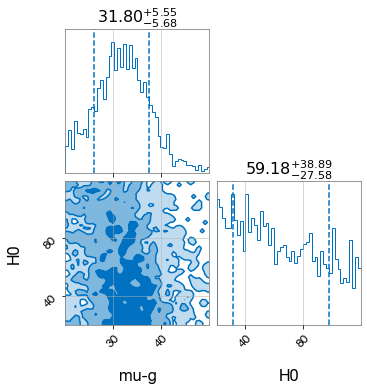

In [2]:
# Select all O1 and O2 BBHs with SNR cut>2
list_ev = icarogw.utils.quick_init.initialize_events_dict(runs=['O1','O2'],type='BBH',snr_cut=12)

# Number of injections to use
outdir='H0_GWTC-1_PL_2/'
inj=pickle.load(open('O1_O2_tutorial.inj','rb'))
inj.update_cut(snr_cut=12,ifar_cut=0) # We are going to update the injections with the new SNR cut to 12

# Read the posterior samples
posterior_dict = {}
for event in list(list_ev.keys()):
    print(event)    
    filename = event+'_GWTC-1.hdf5'
        
    pos_samples = icarogw.posterior_samples.posterior_samples(filename)
    posterior_dict[event]=pos_samples

# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
prior_dict=icarogw.utils.quick_init.initialize_prior_dict('BBH-powerlaw-gaussian','flatLCDM','powerlaw',True)
prior_dict['alpha']=1.6
prior_dict['delta_m']=5
prior_dict['sigma_g']=5.0
prior_dict['lambda_peak']=0.1

prior_dict['mmax']=80.
prior_dict['beta']=0.
prior_dict['gamma']=0
prior_dict['mmin']=5
prior_dict['Om0']=0.308

analysis = icarogw.analyses.cosmo_pop_rate_marginalized.hierarchical_analysis(posterior_dict,inj,scale_free=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby('BBH-powerlaw-gaussian', 'flatLCDM','powerlaw', prior_dict, 
                            parallel=2000,nlive=500,nact=2,walks=20,outdir=outdir,label='ciao')
result.plot_corner()



# Visualization of the different populations

We want to get an intuitive idea of the different populations which correspond to the posterior samples. 
For this purpose we grab 50 samples and generate the corresponding mass and redshift distributions. 

/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/cosmologies.py:107: RuntimeWarning: divide by zero encountered in log10
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/redshift.py:65: RuntimeWarning: divide by zero encountered in log
  prior_trial = _np.exp(_np.log(cosmo.dVc_by_dz(z_trial))-_np.log1p(z_trial)+self.log_rate_eval(z_trial))
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: overflow encountered in exp
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/custom_math_priors.py:161: RuntimeWarning: divide by zero encountered in log
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/custom_math_priors.py:159: RuntimeWarning: divide by zero encountered in log
/Users/leyde/minico

/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/cosmologies.py:107: RuntimeWarning: divide by zero encountered in log10
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/redshift.py:65: RuntimeWarning: divide by zero encountered in log
  prior_trial = _np.exp(_np.log(cosmo.dVc_by_dz(z_trial))-_np.log1p(z_trial)+self.log_rate_eval(z_trial))
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: overflow encountered in exp
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/custom_math_priors.py:161: RuntimeWarning: divide by zero encountered in log
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/custom_math_priors.py:159: RuntimeWarning: divide by zero encountered in log
/Users/leyde/minico

/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/cosmologies.py:107: RuntimeWarning: divide by zero encountered in log10
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/redshift.py:65: RuntimeWarning: divide by zero encountered in log
  prior_trial = _np.exp(_np.log(cosmo.dVc_by_dz(z_trial))-_np.log1p(z_trial)+self.log_rate_eval(z_trial))
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: overflow encountered in exp
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/custom_math_priors.py:161: RuntimeWarning: divide by zero encountered in log
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/custom_math_priors.py:159: RuntimeWarning: divide by zero encountered in log
/Users/leyde/minico

/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/cosmologies.py:107: RuntimeWarning: divide by zero encountered in log10
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/redshift.py:65: RuntimeWarning: divide by zero encountered in log
  prior_trial = _np.exp(_np.log(cosmo.dVc_by_dz(z_trial))-_np.log1p(z_trial)+self.log_rate_eval(z_trial))
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: overflow encountered in exp
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/custom_math_priors.py:161: RuntimeWarning: divide by zero encountered in log
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/custom_math_priors.py:159: RuntimeWarning: divide by zero encountered in log
/Users/leyde/minico

/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/cosmologies.py:107: RuntimeWarning: divide by zero encountered in log10
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/redshift.py:65: RuntimeWarning: divide by zero encountered in log
  prior_trial = _np.exp(_np.log(cosmo.dVc_by_dz(z_trial))-_np.log1p(z_trial)+self.log_rate_eval(z_trial))
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: overflow encountered in exp
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/custom_math_priors.py:161: RuntimeWarning: divide by zero encountered in log
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/custom_math_priors.py:159: RuntimeWarning: divide by zero encountered in log
/Users/leyde/minico

/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/cosmologies.py:107: RuntimeWarning: divide by zero encountered in log10
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/redshift.py:65: RuntimeWarning: divide by zero encountered in log
  prior_trial = _np.exp(_np.log(cosmo.dVc_by_dz(z_trial))-_np.log1p(z_trial)+self.log_rate_eval(z_trial))
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: overflow encountered in exp
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/custom_math_priors.py:161: RuntimeWarning: divide by zero encountered in log
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/custom_math_priors.py:159: RuntimeWarning: divide by zero encountered in log
/Users/leyde/minico

/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/cosmologies.py:107: RuntimeWarning: divide by zero encountered in log10
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/redshift.py:65: RuntimeWarning: divide by zero encountered in log
  prior_trial = _np.exp(_np.log(cosmo.dVc_by_dz(z_trial))-_np.log1p(z_trial)+self.log_rate_eval(z_trial))
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/custom_math_priors.py:48: RuntimeWarning: overflow encountered in exp
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/custom_math_priors.py:161: RuntimeWarning: divide by zero encountered in log
/Users/leyde/miniconda3/envs/icarogw/lib/python3.8/site-packages/icarogw-1.0.5-py3.8.egg/icarogw/priors/custom_math_priors.py:159: RuntimeWarning: divide by zero encountered in log
/Users/leyde/minico

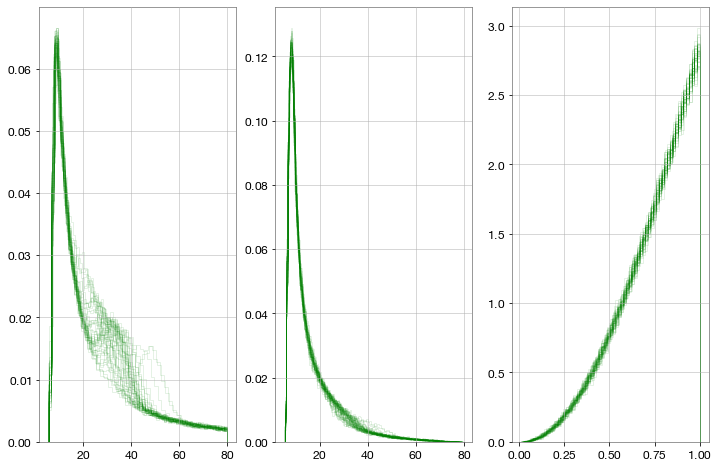

In [9]:
Npos=50
fig,ax=plt.subplots(1,3,figsize=(12,8))
for i in range(Npos):
    chx=np.random.choice(len(result.posterior['H0']),size=1)[0]   
    zp = icarogw.priors.redshift.redshift_prior(icarogw.cosmologies.flatLCDM(H0=result.posterior['H0'][chx],zmax=1.)
                                                ,'powerlaw',dic_param={'gamma':2.7})
    mass_hp = {'alpha':1.6,'beta':0,'mmin':5,'mmax':80,'delta_m':5,'sigma_g':5,'lambda_peak':0.1,
              'mu_g':result.posterior['mu_g'][chx]}
    mp = icarogw.priors.mass.mass_prior(name='BBH-powerlaw-gaussian',hyper_params_dict=mass_hp)
    
    zsamples=zp.sample(50000)
    ms1,ms2=mp.sample(50000)
    ax[0].hist(ms1,bins='auto',density=True,histtype='step',alpha=0.1,color='g')
    ax[1].hist(ms2,bins='auto',density=True,histtype='step',alpha=0.1,color='g')
    ax[2].hist(zsamples,bins='auto',density=True,histtype='step',alpha=0.1,color='g')
    

